<a href="https://colab.research.google.com/github/nildodnjunior/mestrado_comp_ifes_ml/blob/master/aula3a_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [2]:
set(y)

{0, 1, 2}

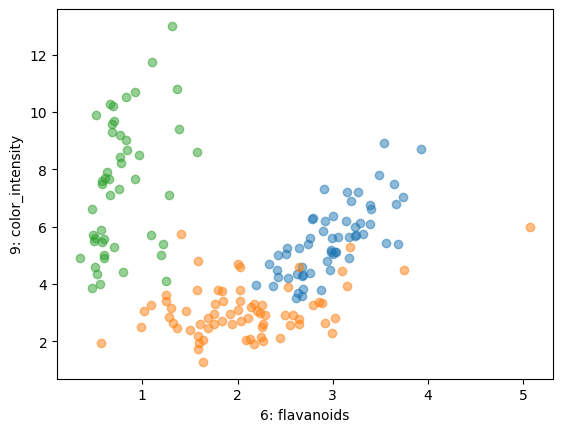

In [3]:
import matplotlib.pyplot as plt
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [4]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred


In [5]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [6]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([1.23739243e-04, 6.72340393e-05, 5.00679016e-05, 4.93526459e-05,
        5.14984131e-05]),
 'score_time': array([0.0016129 , 0.00127316, 0.00119829, 0.00114059, 0.00114179]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[15,  1,  3],
       [ 0, 19,  3],
       [ 0,  8,  5]])

In [8]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.6863398692810457

In [9]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [10]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([7.29560852e-05, 5.60283661e-05, 5.31673431e-05, 8.05854797e-05,
        8.17775726e-05]),
 'score_time': array([0.0021112 , 0.00193596, 0.00354266, 0.00332379, 0.00228858]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [11]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([1.01327896e-04, 1.18255615e-04, 6.65187836e-05, 6.27040863e-05,
        6.12735748e-05]),
 'score_time': array([0.00791216, 0.00582409, 0.00324345, 0.00301695, 0.00311708]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

In [13]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelo = modelos['estimator'][0]
modelo, sum(modelos['test_score'])/50

(Perceptron(), 0.572936507936508)

In [14]:
intercepts = modelo.intercept_
intercepts

array([-105.,  114.,   19.])

In [15]:
coefs = modelo.coef_[:,[6,9]]
coefs

array([[  109.82    ,  -490.499995],
       [  416.45    , -1222.54999 ],
       [ -339.16    ,   929.879991]])

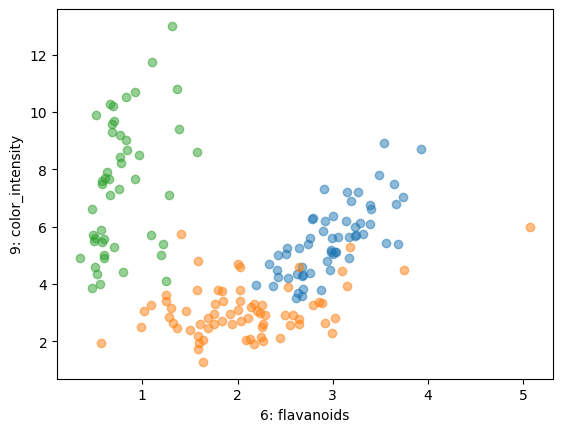

In [17]:
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)

plt.show()

###Plotando hiperplanos separadores

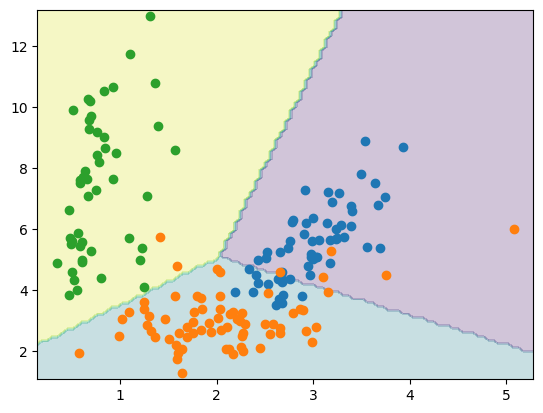

In [19]:
x6s = np.linspace(np.min(X[:, 6]) - 0.2, np.max(X[:, 6]) + 0.2, 100)
x9s = np.linspace(np.min(X[:, 9]) - 0.2, np.max(X[:, 9]) + 0.2, 100)
x6, x9 = np.meshgrid(x6s, x9s)

Xdec = np.c_[x6.ravel(), x9.ravel()]

ypred = modelo.predict(Xdec)
plt.contourf(x6, x9, ypred.reshape(x6.shape), alpha=0.25)

for k in set(y):
  plt.plot(X[:,6][y==k], X[:,9][y==k], 'o')

plt.show()